In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the data from csv file
ds = pd.read_csv('Loan_Pred.csv')
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# dropping the null values 
ds.dropna(inplace=True)

In [4]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (480, 13)
Shape of dataset after removing duplicates:  (480, 13)


In [5]:
# Reading the head of the data
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
# Checking the shape of the data
ds.shape

(480, 13)

In [7]:
# Checking the columns of the dataset
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Checking the datatypes of columns
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
# Checking the dataset columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


# Summarize the 'Loan_Status' distribution


In [10]:
from collections import Counter

target = ds.values[:,-1]
counter = Counter(target)

for k, v in counter.items():
    per = v/len(target) * 100
    print ('Loan_Status =%s, Count=%d, Percentage=%.3f%%' %(k, v, per) )

Loan_Status =N, Count=148, Percentage=30.833%
Loan_Status =Y, Count=332, Percentage=69.167%


# Checking the unique values of columns of dataset

In [11]:
ds['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
ds['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
ds['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [14]:
ds['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
ds['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
ds['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [17]:
ds['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [18]:
ds.shape

(480, 13)

In [19]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32'])
ds_int.columns

Index(['ApplicantIncome'], dtype='object')

In [20]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Checking the count of 'Loan_Status' based on columns

In [21]:
ds.groupby(['Gender'])['Loan_Status'].count()

Gender
Female     86
Male      394
Name: Loan_Status, dtype: int64

In [22]:
ds.groupby(['Education'])['Loan_Status'].count()

Education
Graduate        383
Not Graduate     97
Name: Loan_Status, dtype: int64

In [23]:
ds.groupby(['Self_Employed'])['Loan_Status'].count()

Self_Employed
No     414
Yes     66
Name: Loan_Status, dtype: int64

In [24]:
ds.groupby(['ApplicantIncome'])['Loan_Status'].count()

ApplicantIncome
150      1
645      1
1000     1
1025     1
1299     1
        ..
33846    1
37719    1
39147    1
39999    1
81000    1
Name: Loan_Status, Length: 405, dtype: int64

In [25]:
ds.groupby(['Loan_Amount_Term'])['Loan_Status'].count()

Loan_Amount_Term
36.0       2
60.0       2
84.0       3
120.0      3
180.0     36
240.0      2
300.0      9
360.0    411
480.0     12
Name: Loan_Status, dtype: int64

In [26]:
ds.groupby(['Property_Area'])['Loan_Status'].count()

Property_Area
Rural        139
Semiurban    191
Urban        150
Name: Loan_Status, dtype: int64

In [27]:
ds.groupby(['Married'])['Loan_Status'].count()

Married
No     169
Yes    311
Name: Loan_Status, dtype: int64

# Statistical Summary

In [28]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [29]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
ds.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

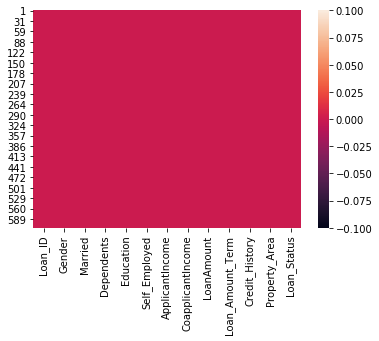

In [31]:
# Checking the null values through heatmap visualization
sns.heatmap(ds.isnull())
plt.show()

# Checking the corelation

In [32]:
ds.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


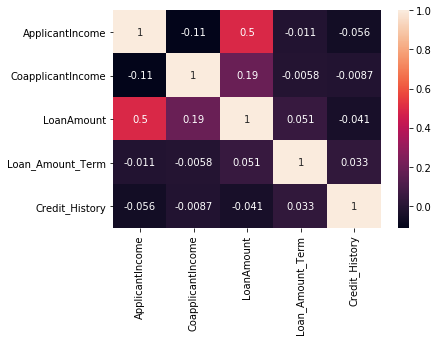

In [33]:
# Checking the corelation through heatmap
sns.heatmap(ds.corr(), annot=True)
plt.show()

# Countplots for features

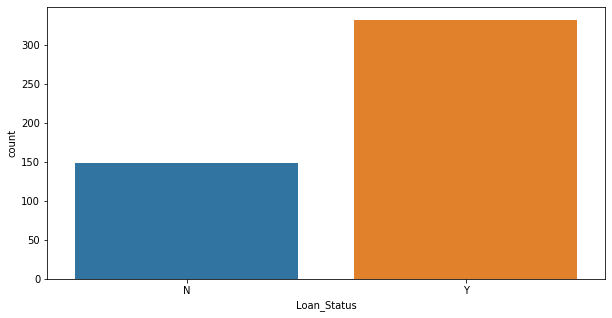

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(ds['Loan_Status'])
plt.show()

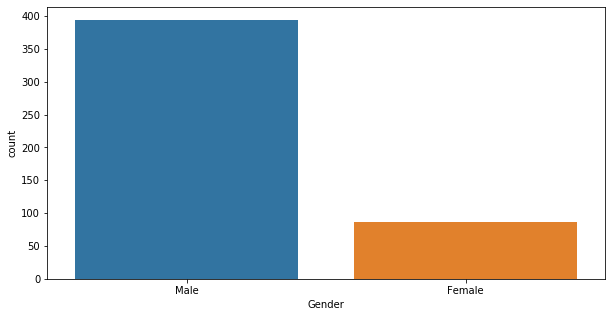

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(ds['Gender'])
plt.show()

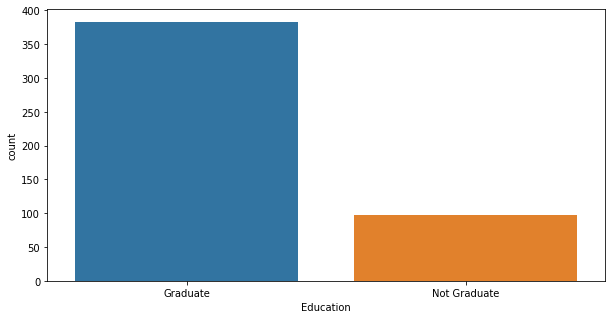

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(ds['Education'])
plt.show()

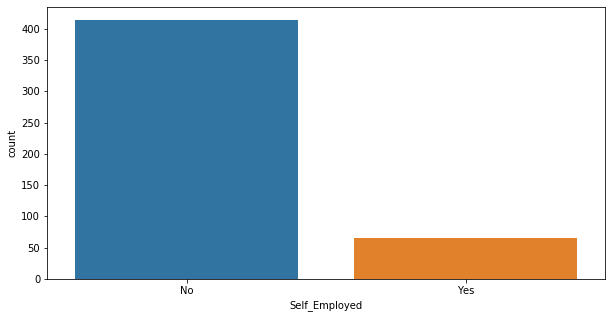

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(ds['Self_Employed'])
plt.show()

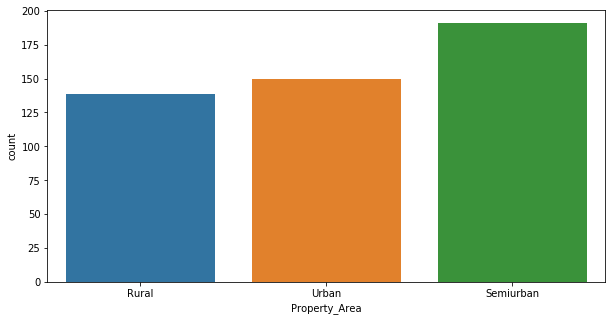

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(ds['Property_Area'])
plt.show()

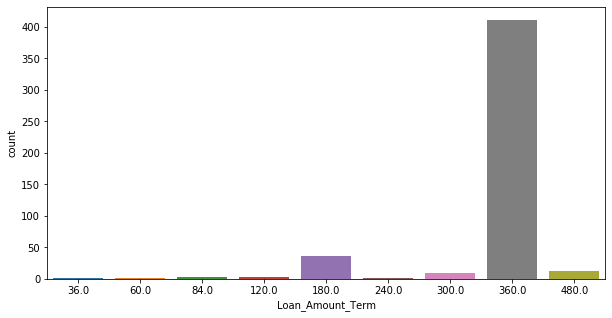

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(ds['Loan_Amount_Term'])
plt.show()

# Pieplot

A pie plot show the data in the form of pie chart

([<matplotlib.patches.Wedge at 0x1bb0153dbc8>,
 [Text(-0.6230468493004775, 0.9065388152620649, 'N'),
  Text(0.6230468493004778, -0.9065388152620647, 'Y')])

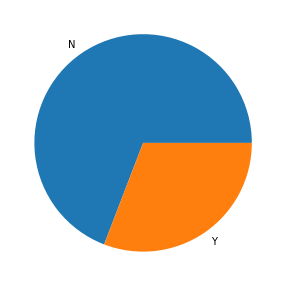

In [40]:
plt.figure(figsize=(10,5))
plt.pie(ds['Loan_Status'].value_counts(), labels=ds.Loan_Status.unique())

In [41]:
# array: used for LabelEncoder as its the categorical data
arr = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [42]:
le = LabelEncoder()
for i in arr:
    ds[i] = le.fit_transform(ds[i])

In [43]:
# After LabelEncoder, checking the data types of columns
ds.dtypes

Loan_ID              int32
Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int32
Loan_Status          int32
dtype: object

# Plotting outliers

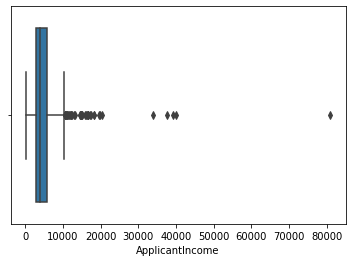

In [44]:
sns.boxplot(ds['ApplicantIncome'])
plt.show()

It seems outliers  are present in the dataset

In [45]:
collist = ds.columns.values
collist

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [46]:
nrows = 13
ncols = 13

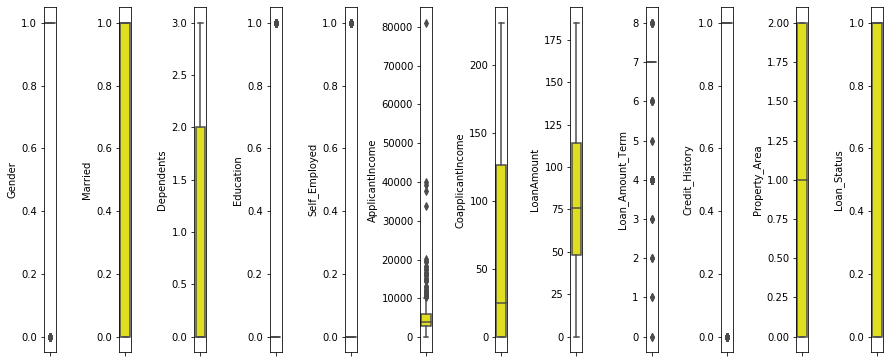

In [47]:
plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

# Distribution plots to check the skewness of data

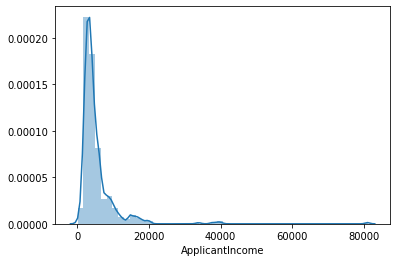

In [48]:
sns.distplot(ds['ApplicantIncome'])

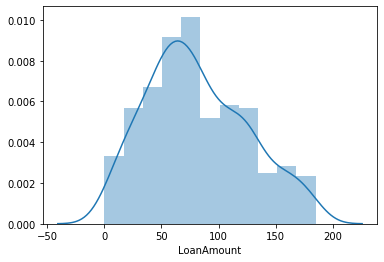

In [49]:
sns.distplot(ds['LoanAmount'])

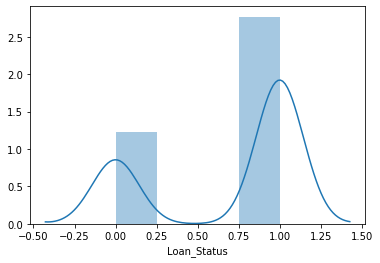

In [50]:
sns.distplot(ds['Loan_Status'])

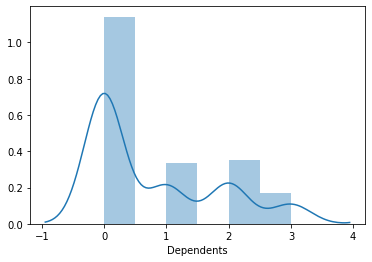

In [51]:
sns.distplot(ds['Dependents'])

# Violinplot

violinplots are used to represent comparison of a variable distribution (or sample distribution)
across different 'categories'

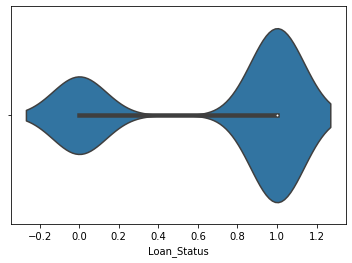

In [52]:
sns.violinplot(ds['Loan_Status'])

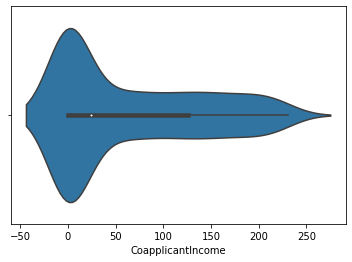

In [53]:
sns.violinplot(ds['CoapplicantIncome'])

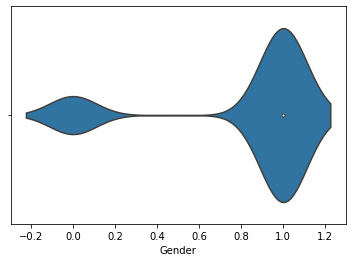

In [54]:
sns.violinplot(ds['Gender'])

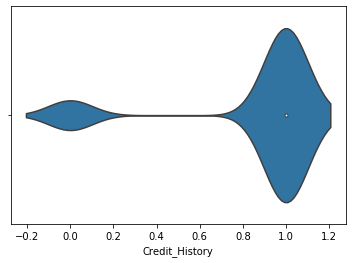

In [55]:
sns.violinplot(ds['Credit_History'])

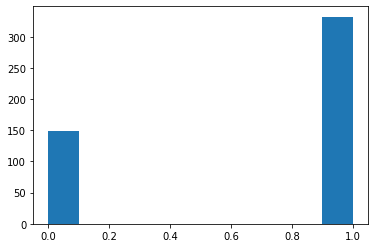

In [56]:
plt.hist(ds['Loan_Status'])
plt.show()

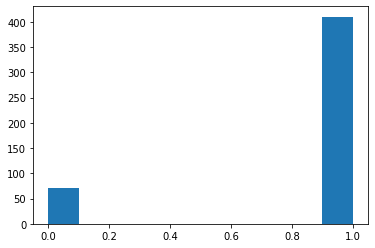

In [57]:
plt.hist(ds['Credit_History'])
plt.show()

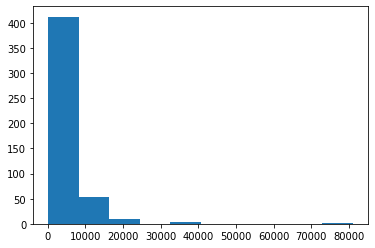

In [58]:
plt.hist(ds['ApplicantIncome'])
plt.show()

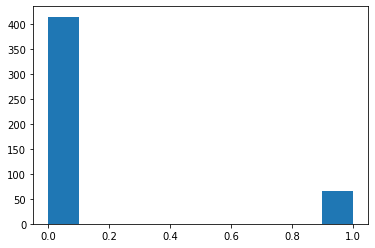

In [59]:
plt.hist(ds['Self_Employed'])
plt.show()

# Bivariate Analysis

Swarmplot show how two values vary with each other but the points are adjusted (only along the categorical axis)
so they don't overlap

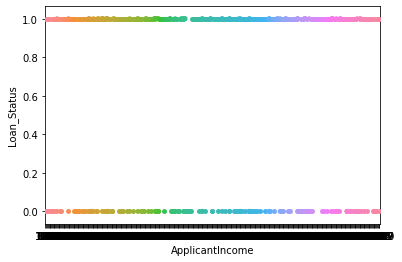

In [60]:
sns.swarmplot(x='ApplicantIncome', y='Loan_Status', data=ds)

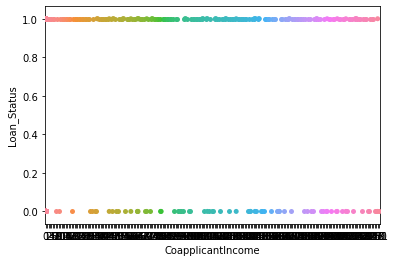

In [61]:
sns.swarmplot(x='CoapplicantIncome', y='Loan_Status', data=ds)

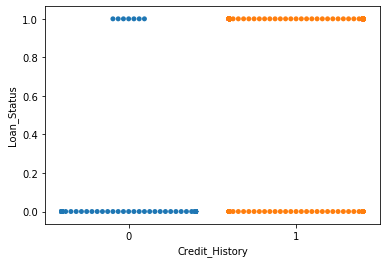

In [62]:
sns.swarmplot(x='Credit_History', y='Loan_Status', data=ds)

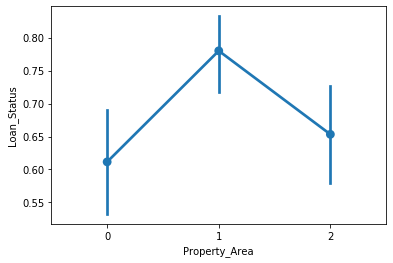

In [63]:
sns.pointplot(x='Property_Area', y='Loan_Status', data=ds)

In [64]:
# Checking the skewness of the data
ds.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    0.774197
LoanAmount           0.387510
Loan_Amount_Term    -3.137580
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [65]:
# Remove skewness 
for col in ds.columns:
    if ds.skew().loc[col] > 0.55:
        ds[col] = np.log1p(ds[col])

In [66]:
ds.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.604000
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      0.565144
CoapplicantIncome   -0.021794
LoanAmount           0.387510
Loan_Amount_Term    -3.137580
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [67]:
for i in range(1, 5):
    # Remove skewness 
    for col in ds.columns:
        if ds.skew().loc[col] > 0.55:
            ds[col] = np.log1p(ds[col])

In [68]:
ds.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.469924
Education            1.488474
Self_Employed        2.111872
ApplicantIncome     -0.002751
CoapplicantIncome   -0.021794
LoanAmount           0.387510
Loan_Amount_Term    -3.137580
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [69]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (480, 13)
After removing zscore:  (463, 13)


In [70]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Loan_Status'])
y = ds_final['Loan_Status']

In [71]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 463, dtype: int32

In [72]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [73]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.733446,0.467355,0.737111,0.679541,-0.504720,-0.396863,0.184849,0.613579,-0.122424,0.278737,0.414912,-1.314730
1,-1.726215,0.467355,0.737111,-0.830198,-0.504720,2.519763,-0.605413,-1.069976,-1.336720,0.278737,0.414912,1.253709
2,-1.718983,0.467355,0.737111,-0.830198,1.981296,-0.396863,-0.893412,1.033557,-0.305714,0.278737,0.414912,1.253709
3,-1.711751,0.467355,-1.356647,-0.830198,-0.504720,-0.396863,0.669065,-1.069976,0.175422,0.278737,0.414912,1.253709
4,-1.704519,0.467355,0.737111,1.295054,-0.504720,2.519763,0.486944,1.192221,1.779209,0.278737,0.414912,1.253709
...,...,...,...,...,...,...,...,...,...,...,...,...
458,1.701723,-2.139699,-1.356647,-0.830198,-0.504720,-0.396863,-0.670231,-1.069976,-1.267987,0.278737,0.414912,-1.314730
459,1.708955,0.467355,0.737111,1.663366,-0.504720,-0.396863,-0.016664,-1.069976,-1.703300,-3.339629,0.414912,-1.314730
460,1.716187,0.467355,0.737111,0.679541,-0.504720,-0.396863,1.186943,-0.476383,1.664653,0.278737,0.414912,1.253709
461,1.723419,0.467355,0.737111,1.295054,-0.504720,-0.396863,1.079132,-1.069976,1.023138,0.278737,0.414912,1.253709


In [74]:
(x.shape, y.shape)

((463, 12), (463,))

# Classification algorithm for dataset: with target column 'Loan_Status'

In [75]:
y.unique()

array([0, 1])

In [76]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [78]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression()
GNB = GaussianNB()

In [79]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))
models.append(('LogisticRegression', LR))
models.append(('GaussianNB', GNB))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  62  is:  0.8602150537634409
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0]


Accuracy score:  0.8602150537634409


cross val score:  0.7842275670675302


[0.         0.42307692 1.        ] [0.         0.97014925 1.        ] [2 1 0]
roc auc score:  0.77353616532721


classification report:                precision    recall  f1-score   support

           0       0.88      0.58      0.70        26
           1       0.86      0.97      0.91        67

    accuracy                           0.86        93
   macro avg       0.87      0.77      0

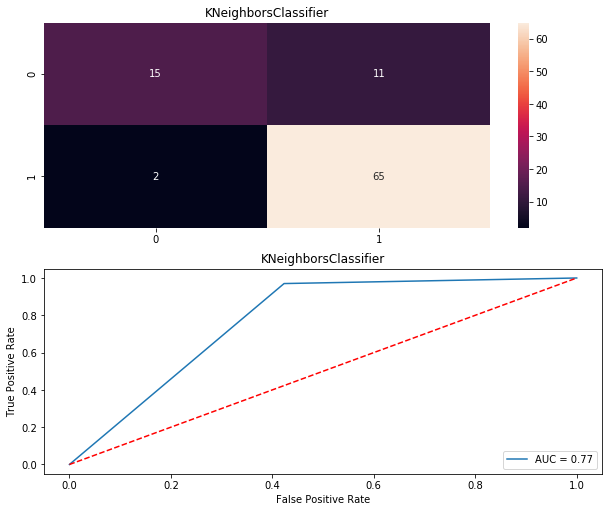

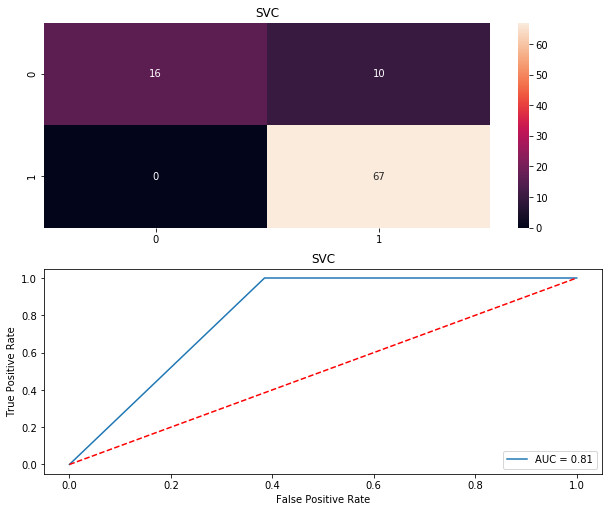

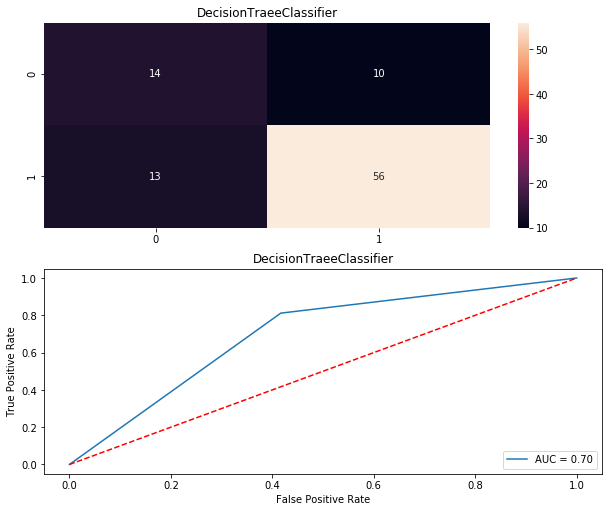

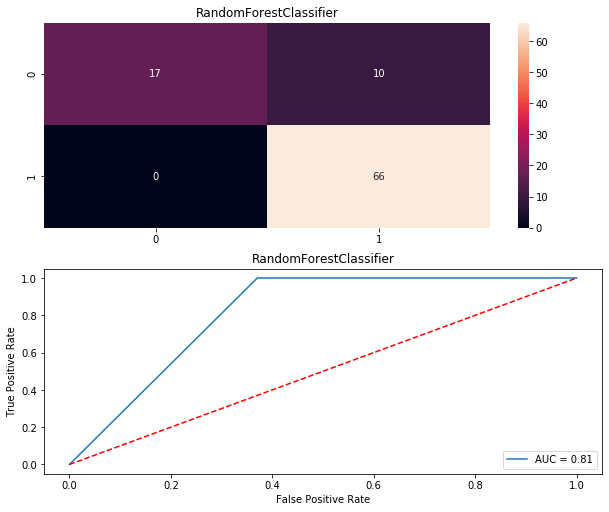

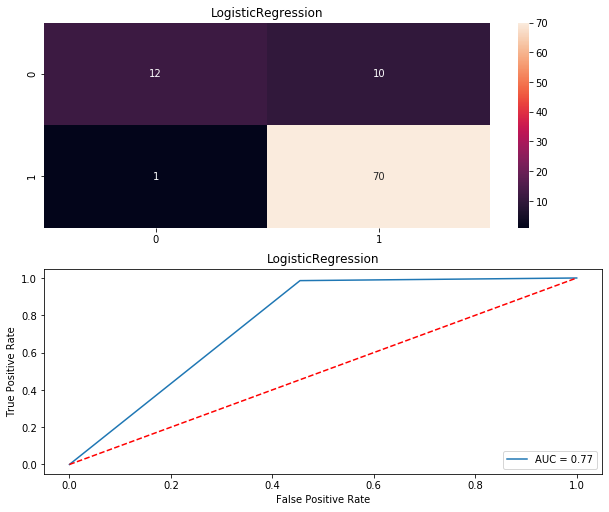

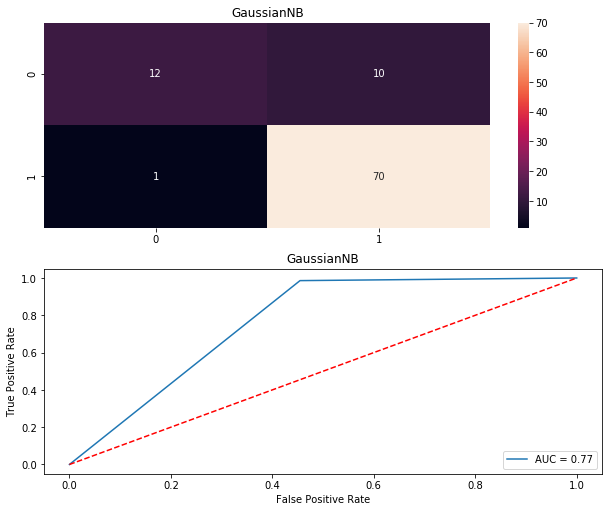

In [80]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [81]:
# Displaying teh data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,86.021505,78.422757,77.353617,62
1,SVC,89.247312,81.655874,80.769231,53
2,DecisionTraeeClassifier,75.268817,66.595745,69.746377,75
3,RandomForestClassifier,89.247312,75.901943,81.481481,88
4,LogisticRegression,88.172043,81.221092,76.568502,44
5,GaussianNB,88.172043,80.356152,76.568502,44


In [82]:
# Using the best model for gridsearchcv 

# GridSearchCV 
parameters = { "C": [1, 10, 100, 500], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear', 'poly']}
gsc = GridSearchCV(estimator = SV, param_grid = parameters, cv=10)

In [83]:
gsc

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 500], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=53, test_size = 0.20)
svc = SVC(C=1.0, gamma='scale', kernel='rbf', )
svc.fit(x_train, y_train)
y_pred =  svc.predict(x_test)
print (y_pred)

[0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


Best model is used to check the loan status of the applicant, the column says 'Yes' and 'No'
to check whether its fraud or not. 
Based on the 'Loan_Status' value , bank will decide whether to give loan to the applicant or not

In [85]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_loan.csv')

accuracy score:  0.8924731182795699
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.62      0.76        26
           1       0.87      1.00      0.93        67

    accuracy                           0.89        93
   macro avg       0.94      0.81      0.85        93
weighted avg       0.91      0.89      0.88        93

Confusion_matrix:  [[16 10]
 [ 0 67]]
cross val score:  0.8165587419056429
roc auc score:  0.8076923076923077
AxesSubplot(0.125,0.808774;0.62x0.0712264)





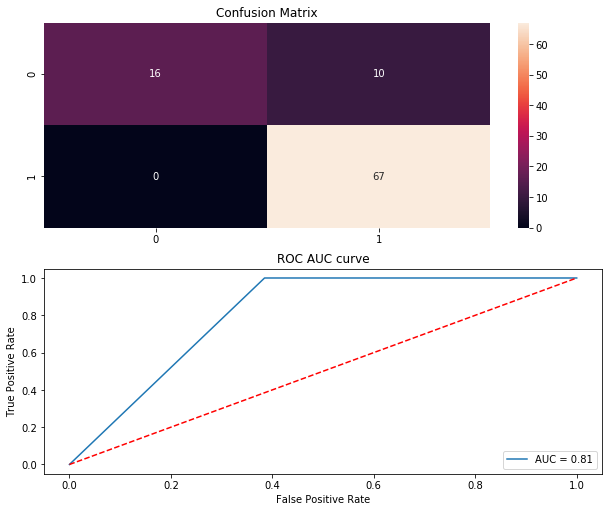

In [86]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(svc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [87]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(svc, 'loan_fraud.pkl')
#clf = joblib.load('loan_fraud.pkl')
#clf.predict(x_test)

['loan_fraud.pkl']